<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-listing-data" data-toc-modified-id="Prepare-listing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare listing data</a></span></li><li><span><a href="#Prepare-demand-data" data-toc-modified-id="Prepare-demand-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare demand data</a></span></li><li><span><a href="#Data-Exploration-eda" data-toc-modified-id="Data-Exploration-eda-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration eda</a></span></li><li><span><a href="#Cluster-model" data-toc-modified-id="Cluster-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster model</a></span><ul class="toc-item"><li><span><a href="#Standardizing-features" data-toc-modified-id="Standardizing-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Standardizing features</a></span></li><li><span><a href="#elbow-chart:-find-an-appropriate-K-value" data-toc-modified-id="elbow-chart:-find-an-appropriate-K-value-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>elbow chart: find an appropriate K value</a></span></li><li><span><a href="#Re-train-kmeans" data-toc-modified-id="Re-train-kmeans-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Re-train kmeans</a></span></li></ul></li><li><span><a href="#Price-prediction-model" data-toc-modified-id="Price-prediction-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Price prediction model</a></span><ul class="toc-item"><li><span><a href="#Fill-in-the-missing-values" data-toc-modified-id="Fill-in-the-missing-values-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fill in the missing values</a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Actual-values-vs-prediction-values----scatterplot" data-toc-modified-id="Actual-values-vs-prediction-values----scatterplot-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Actual values vs prediction values--- scatterplot</a></span></li></ul></li><li><span><a href="#Estimation-demand-function" data-toc-modified-id="Estimation-demand-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Estimation demand function</a></span><ul class="toc-item"><li><span><a href="#cluster-1:-the-estimation-of-demand-function" data-toc-modified-id="cluster-1:-the-estimation-of-demand-function-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>cluster 1: the estimation of demand function</a></span></li><li><span><a href="#cluster-2:-the-estimation-of-demand-function" data-toc-modified-id="cluster-2:-the-estimation-of-demand-function-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>cluster 2: the estimation of demand function</a></span></li><li><span><a href="#cluster-3:-the-estimation-of-demand-function" data-toc-modified-id="cluster-3:-the-estimation-of-demand-function-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>cluster 3: the estimation of demand function</a></span></li><li><span><a href="#cluster-4:-the-estimation-of-demand-function" data-toc-modified-id="cluster-4:-the-estimation-of-demand-function-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>cluster 4: the estimation of demand function</a></span></li><li><span><a href="#cluster-5:-the-estimation-of-demand-function" data-toc-modified-id="cluster-5:-the-estimation-of-demand-function-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>cluster 5: the estimation of demand function</a></span></li></ul></li><li><span><a href="#optimize-price" data-toc-modified-id="optimize-price-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>optimize price</a></span><ul class="toc-item"><li><span><a href="#cluster-1:-search-for-opt_price-and-occupation_ratio" data-toc-modified-id="cluster-1:-search-for-opt_price-and-occupation_ratio-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>cluster 1: search for opt_price and occupation_ratio</a></span></li><li><span><a href="#cluster-2:-search-for-opt_price-and-occupation_ratio" data-toc-modified-id="cluster-2:-search-for-opt_price-and-occupation_ratio-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>cluster 2: search for opt_price and occupation_ratio</a></span></li><li><span><a href="#cluster-3:-search-for-opt_price-and-occupation_ratio" data-toc-modified-id="cluster-3:-search-for-opt_price-and-occupation_ratio-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>cluster 3: search for opt_price and occupation_ratio</a></span></li><li><span><a href="#cluster-4:-search-for-opt_price-and-occupation_ratio" data-toc-modified-id="cluster-4:-search-for-opt_price-and-occupation_ratio-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>cluster 4: search for opt_price and occupation_ratio</a></span></li><li><span><a href="#cluster-5:-search-for-opt_price-and-occupation_ratio" data-toc-modified-id="cluster-5:-search-for-opt_price-and-occupation_ratio-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>cluster 5: search for opt_price and occupation_ratio</a></span></li></ul></li><li><span><a href="#Application" data-toc-modified-id="Application-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Application</a></span></li></ul></div>

+ case goal：according to the price of airbnb listing and calendar data，find the optimal price of listing 
+ method：
    1. pre-process the data, clean the data, explore data. 
    2. segment customer by clustering, K-means
    3. use machine learning model, estimate the price of listing
    4. combine prediction of price and optimal price, set the final price

In [1]:
# data source ：http://insideairbnb.com/get-the-data.html  search “New York City, New York, United States” and download
# date compiled: 04 December, 2021

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)
sns.set_palette("Set2")
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

# Prepare listing data

In [3]:
df_listing=pd.read_csv("./airbnb_newyork/listings.csv",low_memory=False)

useful_cols=['id', 'host_since', 'host_location',
             'host_neighbourhood','description', 'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 
             'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price','review_scores_rating','minimum_nights']

In [4]:
# We chose a property to do research： Entire rental unit
# Entire rental unit has the most records 
# Only for this property, the relationship between price and demand is obvious  

df_listing["property_type"].value_counts().head()

Entire rental unit                  16014
Private room in rental unit         11664
Private room in residential home     1980
Private room in townhouse            1180
Entire residential home              1156
Name: property_type, dtype: int64

In [5]:
# choose property type & minimum_nights=1（short term demand）

# df_listing=df_listing[df_listing["property_type"].isin(["Entire rental unit","Entire residential home","Entire condominium (condo)","Entire guest suite"])].copy()
df_listing=df_listing[df_listing["property_type"].isin(["Entire rental unit"])].copy()
df_listing=df_listing[df_listing["minimum_nights"]==1]
df_listing=df_listing[useful_cols].copy()

df_listing.head(1)

,id,host_since,host_location,host_neighbourhood,description,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,review_scores_rating,minimum_nights
78,33014,2010-06-12,"New York, New York, United States",Alphabet City,"That's the view from our window! This is our apartment. We travel quite a bit and happy to share our place with mellow tidy people. It is quite big for NYC at 700sq ft : 2 real bedrooms, one wi...","New York, United States",40.72367,-73.98139,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,2.0,$125.00,4.41,1


In [6]:
#choose host_since before 2021-01-01，since our the date of demand data is from 2021-12-04, in this way, the listings last for at least one year
#the sample we chose is representative. If they come from new listings, they are not representative

df_listing["host_since"]=pd.to_datetime(df_listing["host_since"])
df_listing=df_listing[df_listing["host_since"]<='2021-01-01'].copy()

In [7]:
# clean bathroom characteristic

def extract_bathroom_type(text):
    if "shared" in str(text).lower():
        return "shared"
    else:
        return "private"

def extract_n_bathrooms(text):
    if "half" in str(text).lower():
        return 0.5
    elif len(re.findall(r'(\d+\.?\d*)',str(text)))>0:
        return eval(re.findall(r'(\d+\.?\d*)',str(text))[0])
    else:
        return 0
    
df_listing["bathrooms"]=df_listing["bathrooms_text"].map(extract_n_bathrooms)
# df_listing["bathroom_type"]=df_listing["bathrooms_text"].map(extract_bathroom_type)

df_listing["price"]=df_listing["price"].map(lambda x: eval(x.replace("$","").replace(",","")))

df_listing=df_listing.drop(["bathrooms_text","minimum_nights"],axis=1)

In [8]:
# delete the useless variable

df_listing=df_listing.drop(["property_type","room_type","neighbourhood","host_location","beds"],axis=1)
# df_listing=df_listing.drop(["property_type","room_type","neighbourhood","host_location","host_neighbourhood","beds"],axis=1)

df_listing.head()

,id,host_since,host_neighbourhood,description,latitude,longitude,accommodates,bathrooms,bedrooms,price,review_scores_rating
78,33014,2010-06-12,Alphabet City,"That's the view from our window! This is our apartment. We travel quite a bit and happy to share our place with mellow tidy people. It is quite big for NYC at 700sq ft : 2 real bedrooms, one wi...",40.72367,-73.98139,3,1.0,2.0,125.0,4.41
155,65425,2010-12-10,Lower East Side,"Airbnb made an error duplicating my apartment listing. Please message me first, do not request to book.<br /><br />Thank you<br /><br /><b>The space</b><br />2 Bedroom apartment, Chrystie st and ...",40.72021,-73.99426,7,1.0,2.0,399.0,5.00
161,66275,2010-12-10,Lower East Side,"DO NOT reserve this apartment without contacting me!!!!!<br />Scroll down and ""CONTACT HOST"" first.<br /><br />Thank you for visiting my Apartment!<br />I used to live in this great apartment and ...",40.72036,-73.99435,7,1.0,2.0,485.0,4.86
204,94209,2011-04-12,Crown Heights,Bright pre-war 1BR w/ high ceilings and a classic brooklyn feel! Comfortably fits up to 4ppl w/ 2 queen beds separated by a lightweight linen partition. Centrally located and half a block from the...,40.67654,-73.94629,4,1.0,1.0,101.0,4.88
296,179741,2010-12-10,Lower East Side,"DO NOT book my apartment before contacting me first. Please scroll down, “contact host” and message me if available. Usually, i wil reply very fast!<br /><br /><b>The space</b><br />DO NOT reque...",40.72212,-73.99638,6,1.0,2.0,526.0,4.94


# Prepare demand data

+ In the calendar table, the column of available represents that the availability of listing in the future
+ available: T nobody rent， availble: F somebody rent
+ According to calendar, we compute the demand (occupation_rate) in the next 30 days after 2021-12-04 

In [9]:
df_calendar=pd.read_csv("./airbnb_newyork/calendar.csv")
df_calendar["date"]=pd.to_datetime(df_calendar["date"])
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,$150.00,$150.00,30.0,1125.0
1,65615,2021-12-05,f,$85.00,$85.00,10.0,1125.0
2,65615,2021-12-06,f,$85.00,$85.00,10.0,1125.0
3,65615,2021-12-07,f,$85.00,$85.00,10.0,1125.0
4,65615,2021-12-08,f,$85.00,$85.00,10.0,1125.0


In [10]:

df_calendar=df_calendar[df_calendar["date"]<'2022-01-04'].copy()

df_calendar_stats30=df_calendar.pivot_table(index="listing_id",columns="available",values="date",aggfunc="count").fillna(0).reset_index()
df_calendar_stats30.columns=["id","not_available_days","available_days"]
df_calendar_stats30["occupation_rate"]=df_calendar_stats30["not_available_days"]/(df_calendar_stats30["not_available_days"]+df_calendar_stats30["available_days"])



df_calendar_stats30.head()

,id,not_available_days,available_days,occupation_rate
0,2595,27.0,3.0,0.900000
1,3831,27.0,3.0,0.900000
2,5121,0.0,30.0,0.000000
3,5136,27.0,3.0,0.900000
4,5178,29.0,1.0,0.966667


In [11]:
#  merge the demand data with listing data

df_listing=pd.merge(df_listing,df_calendar_stats30[["id","occupation_rate"]],on="id")
df_listing.head()

,id,host_since,host_neighbourhood,description,latitude,longitude,accommodates,bathrooms,bedrooms,price,review_scores_rating,occupation_rate
0,33014,2010-06-12,Alphabet City,"That's the view from our window! This is our apartment. We travel quite a bit and happy to share our place with mellow tidy people. It is quite big for NYC at 700sq ft : 2 real bedrooms, one wi...",40.72367,-73.98139,3,1.0,2.0,125.0,4.41,0.933333
1,65425,2010-12-10,Lower East Side,"Airbnb made an error duplicating my apartment listing. Please message me first, do not request to book.<br /><br />Thank you<br /><br /><b>The space</b><br />2 Bedroom apartment, Chrystie st and ...",40.72021,-73.99426,7,1.0,2.0,399.0,5.00,0.933333
2,66275,2010-12-10,Lower East Side,"DO NOT reserve this apartment without contacting me!!!!!<br />Scroll down and ""CONTACT HOST"" first.<br /><br />Thank you for visiting my Apartment!<br />I used to live in this great apartment and ...",40.72036,-73.99435,7,1.0,2.0,485.0,4.86,0.466667
3,94209,2011-04-12,Crown Heights,Bright pre-war 1BR w/ high ceilings and a classic brooklyn feel! Comfortably fits up to 4ppl w/ 2 queen beds separated by a lightweight linen partition. Centrally located and half a block from the...,40.67654,-73.94629,4,1.0,1.0,101.0,4.88,0.966667
4,179741,2010-12-10,Lower East Side,"DO NOT book my apartment before contacting me first. Please scroll down, “contact host” and message me if available. Usually, i wil reply very fast!<br /><br /><b>The space</b><br />DO NOT reque...",40.72212,-73.99638,6,1.0,2.0,526.0,4.94,0.500000


In [12]:
# Check the data information, data type, missing values, unqiue values count

# missing value
df_missing=df_listing.isnull().sum().reset_index()
df_missing.columns=["feature","missing count"]
df_missing["missing percentage"]=df_missing["missing count"]/df_listing.shape[0]
df_missing["missing percentage"]=df_missing["missing percentage"].map(lambda x:"{:0.2%}".format(x))
df_missing.sort_values(by="missing count",ascending=False,inplace=True)

# unique values count
df_nunique=df_listing.nunique().reset_index()
df_nunique.columns=["feature","unique values"]

# data types
df_types=df_listing.dtypes.reset_index()
df_types.columns=["feature","dtype"]

# merge
df_stats=pd.merge(df_types,df_nunique,on="feature")
df_stats=pd.merge(df_stats,df_missing,on="feature")

# sort df
df_stats=df_stats.sort_values(by=["missing count","unique values"],ascending=[False,True])

df_stats

,feature,dtype,unique values,missing count,missing percentage
2,host_neighbourhood,object,137,260,29.08%
8,bedrooms,float64,7,170,19.02%
10,review_scores_rating,float64,96,122,13.65%
3,description,object,832,23,2.57%
7,bathrooms,float64,10,0,0.00%
6,accommodates,int64,15,0,0.00%
11,occupation_rate,float64,33,0,0.00%
9,price,float64,302,0,0.00%
1,host_since,datetime64[ns],611,0,0.00%
4,latitude,float64,847,0,0.00%


In [13]:
df_listing.head()

,id,host_since,host_neighbourhood,description,latitude,longitude,accommodates,bathrooms,bedrooms,price,review_scores_rating,occupation_rate
0,33014,2010-06-12,Alphabet City,"That's the view from our window! This is our apartment. We travel quite a bit and happy to share our place with mellow tidy people. It is quite big for NYC at 700sq ft : 2 real bedrooms, one wi...",40.72367,-73.98139,3,1.0,2.0,125.0,4.41,0.933333
1,65425,2010-12-10,Lower East Side,"Airbnb made an error duplicating my apartment listing. Please message me first, do not request to book.<br /><br />Thank you<br /><br /><b>The space</b><br />2 Bedroom apartment, Chrystie st and ...",40.72021,-73.99426,7,1.0,2.0,399.0,5.00,0.933333
2,66275,2010-12-10,Lower East Side,"DO NOT reserve this apartment without contacting me!!!!!<br />Scroll down and ""CONTACT HOST"" first.<br /><br />Thank you for visiting my Apartment!<br />I used to live in this great apartment and ...",40.72036,-73.99435,7,1.0,2.0,485.0,4.86,0.466667
3,94209,2011-04-12,Crown Heights,Bright pre-war 1BR w/ high ceilings and a classic brooklyn feel! Comfortably fits up to 4ppl w/ 2 queen beds separated by a lightweight linen partition. Centrally located and half a block from the...,40.67654,-73.94629,4,1.0,1.0,101.0,4.88,0.966667
4,179741,2010-12-10,Lower East Side,"DO NOT book my apartment before contacting me first. Please scroll down, “contact host” and message me if available. Usually, i wil reply very fast!<br /><br /><b>The space</b><br />DO NOT reque...",40.72212,-73.99638,6,1.0,2.0,526.0,4.94,0.500000


# Data Exploration eda

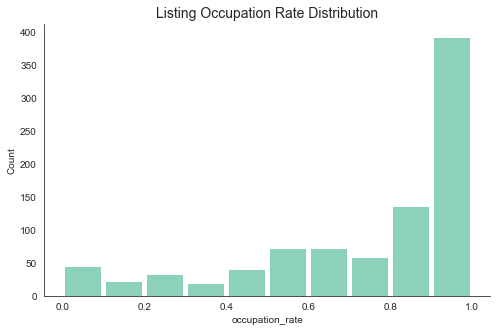

In [14]:
# the distribution of occupation rate 

plt.figure(figsize=(8,5))

sns.histplot(x="occupation_rate",data=df_listing,bins=10,shrink=0.9)
plt.title("Listing Occupation Rate Distribution",fontsize=14)
sns.despine()

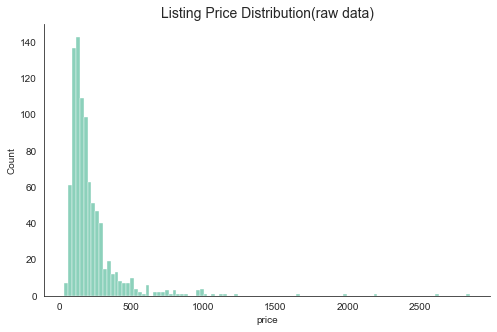

In [15]:
# the distribution of price

plt.figure(figsize=(8,5))

sns.histplot(x="price",data=df_listing)
plt.title("Listing Price Distribution(raw data)",fontsize=14)
sns.despine()

+ There are a few extreme high price. These are the outliers. We decided to use 1.5 IQR principle to remove such outliers

In [16]:
price_q1=df_listing["price"].quantile(0.25)
price_q3=df_listing["price"].quantile(0.75)
iqr=price_q3-price_q1

lower_price=price_q1-1.5*iqr
upper_price=price_q3+1.5*iqr

condition=(df_listing["price"]>100)&(df_listing["price"]<=upper_price)
df_listing=df_listing[condition].copy()

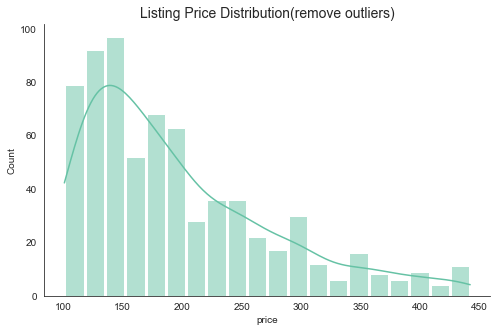

In [17]:
plt.figure(figsize=(8,5))

sns.histplot(x="price",data=df_listing,bins=20,kde=True,shrink=0.9)
plt.title("Listing Price Distribution(remove outliers)",fontsize=14)
sns.despine()

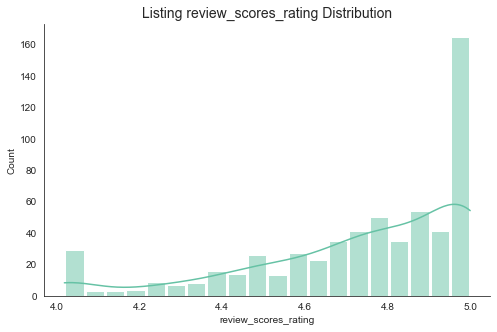

In [18]:
# review_scores_rating

rating_q1=df_listing["review_scores_rating"].quantile(0.25)
rating_q3=df_listing["review_scores_rating"].quantile(0.75)
iqr=rating_q3-rating_q1

lower_rating=rating_q1-1.5*iqr
upper_rating=rating_q3+1.5*iqr

df_listing["review_scores_rating"]=df_listing["review_scores_rating"].map(lambda x: lower_rating if x< lower_rating else x)
df_listing["review_scores_rating"]=df_listing["review_scores_rating"].map(lambda x: upper_rating if x>upper_rating else x)

plt.figure(figsize=(8,5))

sns.histplot(x="review_scores_rating",data=df_listing,bins=20,kde=True,shrink=0.9)
plt.title("Listing review_scores_rating Distribution",fontsize=14)
sns.despine()

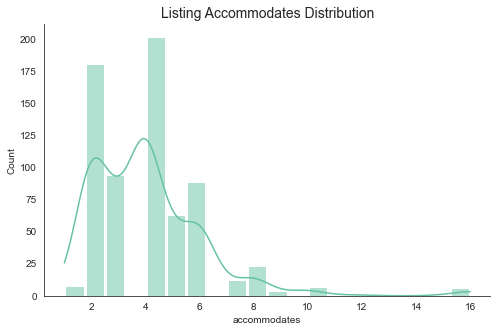

In [19]:
# the distribution of accommodates，use it to stand for the size of a house

plt.figure(figsize=(8,5))

sns.histplot(x="accommodates",data=df_listing,bins=20,kde=True,shrink=0.9)
plt.title("Listing Accommodates Distribution",fontsize=14)
sns.despine()

,index,bedrooms
0,1,341
1,2,177
2,3,33
3,4,5


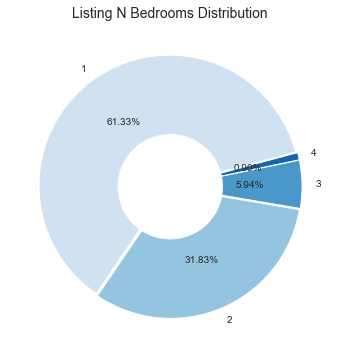

In [20]:
# bedrooms

df_bedroom=df_listing["bedrooms"].value_counts().reset_index()
df_bedroom["index"]=df_bedroom["index"].astype(int)
display(df_bedroom)

# plot
plt.figure(figsize=(6,6))
plt.pie(x=df_bedroom["bedrooms"],labels = df_bedroom["index"],autopct='%0.2f%%'
        ,startangle=15
        ,explode=[0.01]*df_bedroom.shape[0]
        ,colors=sns.color_palette("Blues", n_colors=df_bedroom.shape[0]))

circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Listing N Bedrooms Distribution",fontsize=14)

plt.show()




# Cluster model

+ The goal of make cluster analysis is to divide so many listings into several similar groups 
+ Assumption: The similar listings are applied to a same demand function 
+ Use three features to make cluster analysis, longitude, latitude represent for geographic location, the size of listing is evaluted by accommodates 

In [21]:
# df_cluster=df_listing[['latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bathroom_type']].copy()
df_cluster=df_listing[['latitude', 'longitude', 'accommodates']].copy()

# df_cluster=pd.get_dummies(data=df_cluster,columns=['property_type', 'room_type', 'bathroom_type'])
# df_cluster=pd.get_dummies(data=df_cluster,columns=['property_type'])
df_cluster.head()

,latitude,longitude,accommodates
0,40.72367,-73.98139,3
1,40.72021,-73.99426,7
3,40.67654,-73.94629,4
5,40.73693,-73.98129,2
6,40.68136,-73.96540,3


## Standardizing features

In [22]:
# Before clustering, process standardization of each column

kmeans_scaler=StandardScaler()

kmeans_scaler.fit(df_cluster)

df_cluster=pd.DataFrame(kmeans_scaler.transform(df_cluster),columns=["latitude","longitude","accommodates"])
df_cluster.head()

,latitude,longitude,accommodates
0,-0.118897,-0.621636,-0.495520
1,-0.179213,-0.843894,1.355491
2,-0.940485,-0.015477,-0.032767
3,0.112256,-0.619909,-0.958272
4,-0.856461,-0.345497,-0.495520


## elbow chart: find an appropriate K value

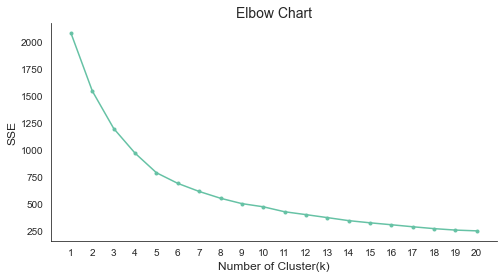

In [23]:
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(8,4))
plt.plot(list(sse.keys()), list(sse.values()),marker="o",markersize=3)
plt.title("Elbow Chart",fontsize=14)
plt.xticks(range(1,21))
plt.xlabel("Number of Cluster(k)",fontsize=12)
plt.ylabel("SSE",fontsize=12)
sns.despine()
plt.show()

## Re-train kmeans

In [24]:
# According to the above plot, when the number of clusters is 5, it is appropriate 
# Use n=5 and re-train it 

kmeans_model = KMeans(n_clusters=5, max_iter=1000,random_state=1).fit(df_cluster)
df_cluster["clusters"] = kmeans_model.labels_+1
df_listing["clusters"] = kmeans_model.labels_+1

In [25]:
df_listing["clusters"].value_counts().sort_index()

1    207
2    263
3    126
4     58
5     38
Name: clusters, dtype: int64

# Price prediction model

Based on "latitude","longitude","accommodates","bathrooms","bedrooms","review_scores_rating","host_neighbourhood" "descripition" these features, predict a price

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Fill in the missing values

In [27]:
# make the log transfromation of price, since the original distribution of price is skewed 

df_listing["price_log"]=np.log(df_listing["price"])

# bedrooms: fill in missing the values by mode
df_listing["bedrooms"]=df_listing["bedrooms"].fillna(df_listing["bedrooms"].mode()[0])

# review_scores_rating: fill in missing the values by mean
df_listing["review_scores_rating"]=df_listing["review_scores_rating"].fillna(df_listing["review_scores_rating"].mean())

#  description: ""
df_listing["description"]=df_listing["description"].fillna("")

In [28]:
X=df_listing[["latitude","longitude","accommodates","bathrooms","bedrooms","review_scores_rating","host_neighbourhood","description"]]
y=df_listing["price_log"]

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=1)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

## Train model

+  "latitude","longitude","accommodates","bathrooms","bedrooms","review_scores_rating","host_neighbourhood","description" 
+  host_neighbourhood is category variable，use onehot encoding before building model
+ description is text contents，use TfidfVectorizer to extract text characteristic

In [29]:
# Train a RandomForest model, based on given features, predict a price 

num_cols=["latitude","longitude","accommodates","bathrooms","bedrooms","review_scores_rating"]
text_cols="description"
cat_cols=["host_neighbourhood"]

# Use one-hot encoding category characteristic
categorical_transformer = Pipeline([ ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

# Use tfidf process description
text_transformer = Pipeline([ ('tfidf', TfidfVectorizer(stop_words='english'))])

# Continuous characteristic Standardization
numerical_transformer = Pipeline( [  ('scaler', StandardScaler()) ])


preprocessor = ColumnTransformer( [ 
                                                            ('onehot_pipe', categorical_transformer, cat_cols),
                                                            ('tfidf_pipe', text_transformer, text_cols),
                                                            ('scaler_pipe', numerical_transformer, num_cols) ],
                                                            remainder = 'passthrough')

rf = Pipeline(
    [
      ('preprocessing', preprocessor),
     ('regressor', RandomForestRegressor(random_state=1))   
    ])

# use GridSearchCV to take hyperparameter optimization, GridSearchCV can automatically adust the parameters and search the optimal param and results
parameters = {'regressor__max_depth': range(1,21),'regressor__n_estimators':range(50,201,50)}

grid_rf = GridSearchCV(rf, parameters,cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X, y)

# Print out R squared
print("Price Predict Model R2: ",grid_rf.score(X, y))

Price Predict Model R2:  0.8620164608803532


## Actual values vs prediction values--- scatterplot

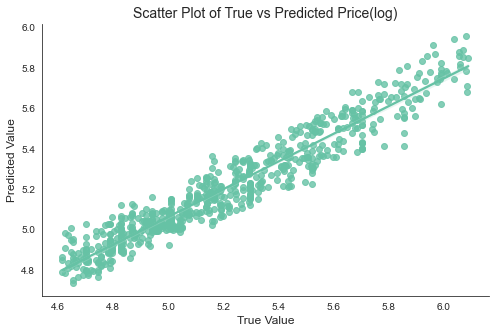

In [30]:
# The scatterplot of actual values and prediction values

y_pred=grid_rf.predict(X)

# train plot
plt.figure(figsize=(8,5))
# plt.scatter(y,y_pred,s=2)
sns.regplot(y,y_pred)
sns.despine()
plt.xlabel("True Value",fontsize=12)
plt.ylabel("Predicted Value",fontsize=12)
plt.title("Scatter Plot of True vs Predicted Price(log)",fontsize=14)
plt.show()

In [31]:
# Price prediction model is not acurrate enough, only for pricing reference
# Later on, we continue adding optimization to find a suitable price and combining the previous method

price_predict_model=grid_rf.best_estimator_

# Estimation demand function

+ For each cluster, estimate an ols demand function


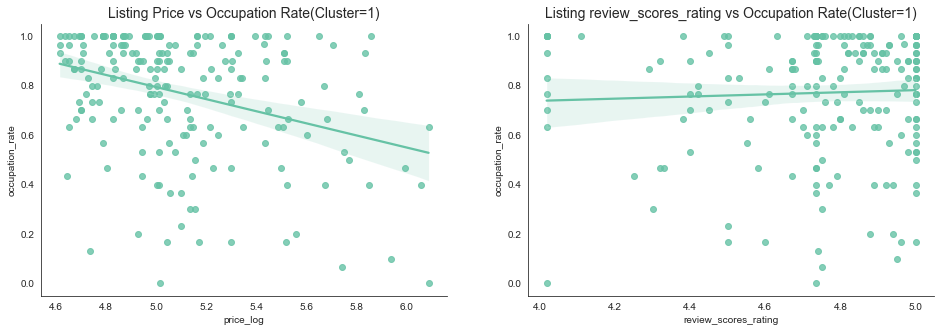

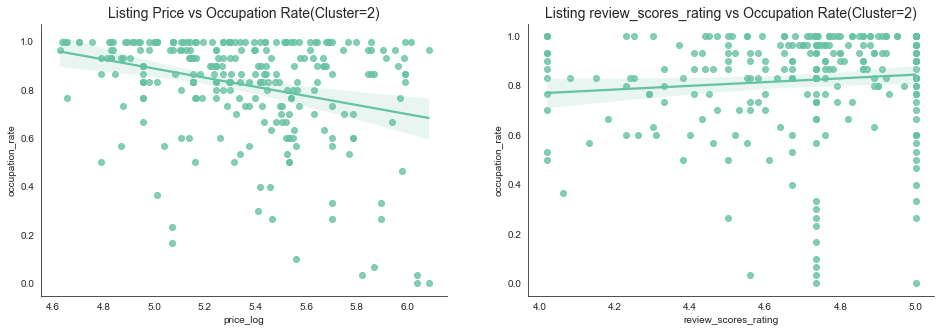

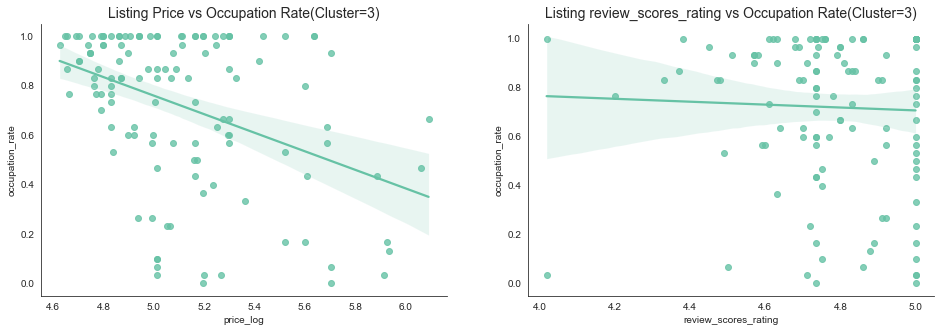

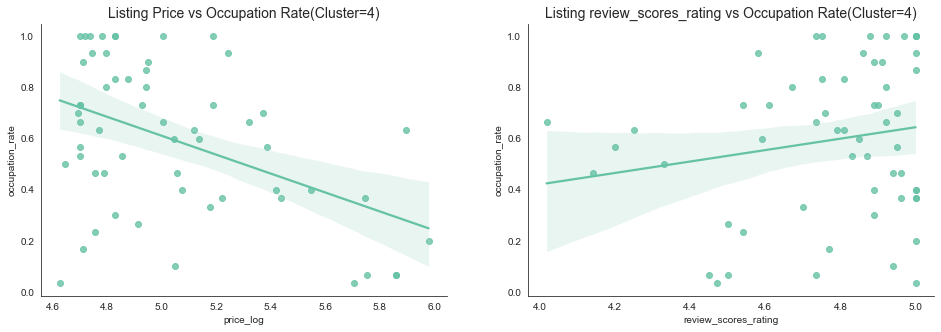

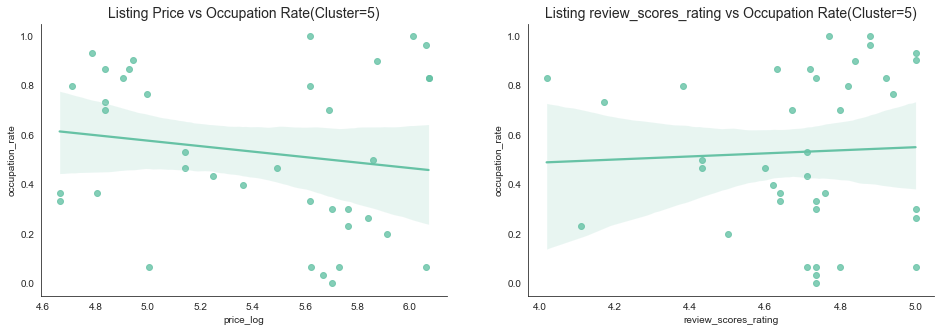

In [32]:
# Check the relationship between price and occupation rate in each cluster
# From the following scatterplot, it seems that they have the negative relationship

for l in range(5):
    fig,axs=plt.subplots(1,2,figsize=(16,5))

    sns.regplot(x="price_log",y="occupation_rate",data=df_listing[df_listing["clusters"]==(l+1)],ax=axs[0])
    axs[0].set_title("Listing Price vs Occupation Rate(Cluster={})".format(l+1),fontsize=14)
    sns.despine()
    
    sns.regplot(x="review_scores_rating",y="occupation_rate",data=df_listing[df_listing["clusters"]==(l+1)],ax=axs[1])
    axs[1].set_title("Listing review_scores_rating vs Occupation Rate(Cluster={})".format(l+1),fontsize=14)
    sns.despine()
    
    plt.show()

In [33]:
# sns.pairplot(df_listing[["price_log","review_scores_rating","occupation_rate","clusters"]],hue="clusters",palette=sns.color_palette("Blues_r", n_colors=5),corner=True)

## cluster 1: the estimation of demand function

In [34]:
coefficient_list=[]

In [35]:
df_ols=df_listing[["price_log","occupation_rate","review_scores_rating","bathrooms","bedrooms","clusters"]].copy()

df_ols1=df_ols[df_ols["clusters"]==0]

# ols estimation

x=df_listing[['price_log', 'review_scores_rating',"bathrooms","bedrooms"]]
y=df_listing["occupation_rate"]

lr_model=LinearRegression()
lr_model.fit(x,y)

# use pipeline, the first step is feature of polynomial, the second step is regression 
# price_log^2 we only look up if there is exponent = 2 in the feature of polynomial 
cluster1_r2=lr_model.score(x,y)

cluster1_intercept=lr_model.intercept_
cluster1_coefficients=lr_model.coef_

coefficient_list.append({"cluster":1,"intercept":cluster1_intercept,"params":cluster1_coefficients,"r2":cluster1_r2})


print("intercept:", cluster1_intercept)
print("coefficients:", cluster1_coefficients)

intercept: 1.5693960982164492
coefficients: [-0.18421689  0.03571206 -0.0155993  -0.00668246]


## cluster 2: the estimation of demand function

In [36]:
df_ols=df_listing[["price_log","occupation_rate","review_scores_rating","bathrooms","bedrooms","clusters"]].copy()

df_ols2=df_ols[df_ols["clusters"]==1]



x=df_ols2[['price_log', 'review_scores_rating',"bathrooms","bedrooms"]]
y=df_ols2["occupation_rate"]

lr_model=LinearRegression()
lr_model.fit(x,y)


cluster2_r2=lr_model.score(x,y)

cluster2_intercept=lr_model.intercept_
cluster2_coefficients=lr_model.coef_

coefficient_list.append({"cluster":2,"intercept":cluster2_intercept,"params":cluster2_coefficients,"r2":cluster2_r2})


print("intercept:", cluster2_intercept)
print("coefficients:", cluster2_coefficients)

intercept: 1.6965653491652075
coefficients: [-0.2514821   0.07357405 -0.01152593  0.01373149]


## cluster 3: the estimation of demand function

In [37]:
df_ols=df_listing[["price_log","occupation_rate","review_scores_rating","bathrooms","bedrooms","clusters"]].copy()

df_ols3=df_ols[df_ols["clusters"]==2]



x=df_ols3[['price_log', 'review_scores_rating',"bathrooms","bedrooms"]]
y=df_ols3["occupation_rate"]

lr_model=LinearRegression()
lr_model.fit(x,y)


cluster3_r2=lr_model.score(x,y)

cluster3_intercept=lr_model.intercept_
cluster3_coefficients=lr_model.coef_

coefficient_list.append({"cluster":3,"intercept":cluster3_intercept,"params":cluster3_coefficients,"r2":cluster3_r2})


print("intercept:", cluster3_intercept)
print("coefficients:", cluster3_coefficients)

intercept: 1.293414167552147
coefficients: [-0.20066766  0.09281732  0.05806902  0.0904945 ]


## cluster 4: the estimation of demand function

In [38]:
df_ols=df_listing[["price_log","occupation_rate","review_scores_rating","bathrooms","bedrooms","clusters"]].copy()

df_ols4=df_ols[df_ols["clusters"]==3]



x=df_ols4[['price_log', 'review_scores_rating',"bathrooms","bedrooms"]]
y=df_ols4["occupation_rate"]

lr_model=LinearRegression()
lr_model.fit(x,y)


cluster4_r2=lr_model.score(x,y)

cluster4_intercept=lr_model.intercept_
cluster4_coefficients=lr_model.coef_

coefficient_list.append({"cluster":4,"intercept":cluster4_intercept,"params":cluster4_coefficients,"r2":cluster4_r2})


print("intercept:", cluster4_intercept)
print("coefficients:", cluster4_coefficients)

intercept: 2.5560350540048473
coefficients: [-0.47382567  0.06986999  0.04369598  0.14946555]


## cluster 5: the estimation of demand function

In [39]:
df_ols=df_listing[["price_log","occupation_rate","review_scores_rating","bathrooms","bedrooms","clusters"]].copy()

df_ols5=df_ols[df_ols["clusters"]==4]



x=df_ols5[['price_log', 'review_scores_rating',"bathrooms","bedrooms"]]
y=df_ols5["occupation_rate"]

lr_model=LinearRegression()
lr_model.fit(x,y)


cluster5_r2=lr_model.score(x,y)

cluster5_intercept=lr_model.intercept_
cluster5_coefficients=lr_model.coef_

coefficient_list.append({"cluster":5,"intercept":cluster5_intercept,"params":cluster5_coefficients,"r2":cluster5_r2})


print("intercept:", cluster5_intercept)
print("coefficients:", cluster5_coefficients)

intercept: 1.173371845468759
coefficients: [-0.4515056   0.3099463   0.14341583  0.03746273]


In [40]:
# 加入 review_scores_rating 之后，price 和 review_scores_rating 依然不是影响 occupation rate 的主要因素

df_cluster_demand_func=pd.DataFrame(coefficient_list)

# 新增两列 opt_price  occupation_ratio 一会儿咱们往里面更新对应的数据
df_cluster_demand_func["opt_price"]=0
df_cluster_demand_func["occupation_ratio"]=0
df_cluster_demand_func

,cluster,intercept,params,r2,opt_price,occupation_ratio
0,1,1.569396,"[-0.1842168904701651, 0.03571206015491389, -0.015599299343532245, -0.006682457376723034]",0.069468,0,0
1,2,1.696565,"[-0.25148210117038833, 0.07357404909447433, -0.011525931202655146, 0.013731493320675352]",0.119721,0,0
2,3,1.293414,"[-0.20066766100935934, 0.0928173168188642, 0.058069016451785624, 0.09049449732074166]",0.132167,0,0
3,4,2.556035,"[-0.4738256668214269, 0.06986999076708902, 0.04369598458630955, 0.14946554829086195]",0.238783,0,0
4,5,1.173372,"[-0.4515056042832678, 0.3099462953303792, 0.143415830556349, 0.03746273331657696]",0.280845,0,0


# optimize price

+ demand function d = intercept + a*price_log + b* review_scores_rating + c*bathrooms + d*bedrooms
+ When we have demand function，use scipy.optimize to find opt_price and occupation_ratio
+ attention: the opt_price is log(price), later convert


In [41]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
from scipy.optimize import minimize
import numpy as np

## cluster 1: search for opt_price and occupation_ratio 

In [42]:

# Scipy.optimize.minimize
# define the obejctive function

# d= 1.569 -0.184 * price_log +0.36 * review_scores_rating - 0.016 * bathrooms - 0.007*bedrooms
def obj_function(x):  
    # optimize.minimize only for solving the minimum question, we need to max (revenue = price*demand), so we need to multiply -1 to transfer solving max into min
    
    fx = -1*(1.569*x[0] - 0.184*x[0]**2 + 0.036*x[1]*x[0] - 0.016*x[2]*x[0] - 0.007*x[3]*x[0])
    return fx

def constraint1(x):  # Constraints f(x)： demand >=0
    return 1.569 - 0.184*x[0] + 0.036*x[1] - 0.016*x[2] - 0.007*x[3]

def constraint2(x):  # Constraintsf(x): demand <=1
    return -1*(1.569 - 0.184*x[0] + 0.036*x[1] - 0.016*x[2] - 0.007*x[3])+1

def constraint3(x):  # Constraints f(x): price*demand>=0
    return (1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3])*x[0]

# define the initial value of searching
X_init = np.array([1.0,1.0,1.0,1.0])  

# bond1 the constraint for price (>0)
bond1 = (0, 6) 

# the range of review_scores_rating 
bond2 = (1, 5) 

# the range of bathrooms 
bond3 = (0, 5) 

# the range of bedrooms 
bond4 = (0, 10) 
bnds = (bond1,bond2,bond3,bond4)

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'ineq', 'fun': constraint3}

cons = ([con1,con2,con3])

res = minimize(obj_function, X_init, method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res):\t{}".format(res.message))  # print out if the optimization is success or not?

print("Occupation Ratio = {:0.2%}".format(constraint1(res.x)))
print("Optimized Price = {:0.0f}".format(np.exp(res.x[0]))) 

# Save in the previous dataframe and use it later easily
df_cluster_demand_func.iloc[0,-2]= np.exp(res.x[0]).round(0)
df_cluster_demand_func.iloc[0,-1]= constraint1(res.x)

Optimization problem (res):	Optimization terminated successfully
Occupation Ratio = 87.45%
Optimized Price = 116


## cluster 2: search for opt_price and occupation_ratio 

In [43]:

# d= 1.697 -0.251 * price_log +0.074 * review_scores_rating - 0.012 * bathrooms + 0.014*bedrooms

def obj_function(x):  
    #  optimize.minimize only for solving the minimum question, we need to max (revenue = price*demand), so we need to multiply -1 to transfer solving max into min
    
    fx = -1*(1.697*x[0] - 0.251*x[0]**2 + 0.074*x[1]*x[0] - 0.012*x[2]*x[0] + 0.014*x[3]*x[0])
    return fx

def constraint1(x):  # Constraints f(x)： demand >=0
    return 1.697 - 0.251*x[0] + 0.074*x[1] - 0.012*x[2] + 0.014*x[3]

def constraint2(x):  # Constraintsf(x): demand <=1
    return -1*(1.697 - 0.251*x[0] + 0.074*x[1] - 0.012*x[2] + 0.014*x[3])+1

def constraint3(x):  # Constraints f(x): price*demand>=0
    return (1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3])*x[0]

# define the initial value of searching
X_init = np.array([1.0,1.0,1.0,1.0])  

# bond1 the constraint for price (>0)
bond1 = (0, 6) 

# the range of review_scores_rating 
bond2 = (1, 5) 

# the range of bathrooms 
bond3 = (0, 5) 

# the range of bedrooms 
bond4 = (0, 10) 
bnds = (bond1,bond2,bond3,bond4)

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'ineq', 'fun': constraint3}

cons = ([con1,con2,con3])

res = minimize(obj_function, X_init, method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res):\t{}".format(res.message))  # print out if the optimization is success or not?

print("Occupation Ratio = {:0.2%}".format(constraint1(res.x)))
print("Optimized Price = {:0.0f}".format(np.exp(res.x[0])))

# Save in the previous dataframe and use it later easily
df_cluster_demand_func.iloc[1,-2]= np.exp(res.x[0]).round(0)
df_cluster_demand_func.iloc[1,-1]= constraint1(res.x)

Optimization problem (res):	Optimization terminated successfully
Occupation Ratio = 100.00%
Optimized Price = 123


## cluster 3: search for opt_price and occupation_ratio 

In [44]:

# d= 1.293 - 0.201 * price_log + 0.093 * review_scores_rating + 0.058 * bathrooms + 0.09*bedrooms

def obj_function(x):  
    #  optimize.minimize only for solving the minimum question, we need to max (revenue = price*demand), so we need to multiply -1 to transfer solving max into min
    
    fx = -1*(1.293*x[0] - 0.201*x[0]**2 + 0.093*x[1]*x[0] + 0.058*x[2]*x[0] + 0.09*x[3]*x[0])
    return fx

def constraint1(x):  # Constraints f(x)： demand >=0
    return 1.293 - 0.201*x[0] + 0.093*x[1] + 0.058*x[2] + 0.09*x[3]

def constraint2(x):  # Constraintsf(x): demand <=1
    return -1*(1.293 - 0.201*x[0] + 0.093*x[1] + 0.058*x[2] + 0.09*x[3])+1

def constraint3(x):  # Constraints f(x): price*demand>=0
    return (1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3])*x[0]

# define the initial value of searching
X_init = np.array([1.0,1.0,1.0,1.0])  

# bond1 the constraint for price (>0)
bond1 = (0, 6)  

# the range of review_scores_rating 
bond2 = (1, 5) 

# the range of bathrooms 
bond3 = (0, 5) 

# the range of bedrooms 
bond4 = (0, 10) 
bnds = (bond1,bond2,bond3,bond4)

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'ineq', 'fun': constraint3}

cons = ([con1,con2,con3])

res = minimize(obj_function, X_init, method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res):\t{}".format(res.message))  # print out if the optimization is success or not?

print("Occupation Ratio = {:0.2%}".format(constraint1(res.x)))
print("Optimized Price = {:0.0f}".format(np.exp(res.x[0])))

# Save in the previous dataframe and use it later easily
df_cluster_demand_func.iloc[2,-2]= np.exp(res.x[0]).round(0)
df_cluster_demand_func.iloc[2,-1]= constraint1(res.x)

Optimization problem (res):	Optimization terminated successfully
Occupation Ratio = 100.00%
Optimized Price = 403


## cluster 4: search for opt_price and occupation_ratio 

In [45]:

# d= 2.556 - 0.474 * price_log + 0.07 * review_scores_rating + 0.044 * bathrooms + 0.149*bedrooms

def obj_function(x):  
    #  optimize.minimize only for solving the minimum question, we need to max (revenue = price*demand), so we need to multiply -1 to transfer solving max into min
    
    fx = -1*(2.556*x[0] - 0.474*x[0]**2 + 0.07*x[1]*x[0] + 0.044*x[2]*x[0] + 0.149*x[3]*x[0])
    return fx

def constraint1(x):  # Constraints f(x)： demand >=0
    return 2.556 - 0.474*x[0] + 0.07*x[1] + 0.044*x[2] + 0.149*x[3]

def constraint2(x):  # Constraintsf(x): demand <=1
    return -1*(2.556 - 0.474*x[0] + 0.07*x[1] + 0.044*x[2] + 0.149*x[3])+1

def constraint3(x):  # Constraints f(x): price*demand>=0
    return (1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3])*x[0]

# define the initial value of searching
X_init = np.array([1.0,1.0,1.0,1.0])  

# bond1 the constraint for price (>0)
bond1 = (0, 6) 

# the range of review_scores_rating 
bond2 = (1, 5) 

# the range of bathrooms
bond3 = (0, 5) 

# the range of bedrooms
bond4 = (0, 10) 
bnds = (bond1,bond2,bond3,bond4)

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'ineq', 'fun': constraint3}

cons = ([con1,con2,con3])

res = minimize(obj_function, X_init, method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res):\t{}".format(res.message))  # print out if the optimization is success or not?


print("Occupation Ratio = {:0.2%}".format(constraint1(res.x)))
print("Optimized Price = {:0.0f}".format(np.exp(res.x[0])))

# Save in the previous dataframe and use it later easily
df_cluster_demand_func.iloc[3,-2]= np.exp(res.x[0]).round(0)
df_cluster_demand_func.iloc[3,-1]= constraint1(res.x)

Optimization problem (res):	Optimization terminated successfully
Occupation Ratio = 100.00%
Optimized Price = 403


## cluster 5: search for opt_price and occupation_ratio 

In [46]:

# d= 1.173 - 0.452 * price_log + 0.31 * review_scores_rating + 0.143 * bathrooms + 0.037*bedrooms

def obj_function(x):  
     #  optimize.minimize only for solving the minimum question, we need to max (revenue = price*demand), so we need to multiply -1 to transfer solving max into min
    
    fx = -1*(1.173*x[0] - 0.452*x[0]**2 + 0.31*x[1]*x[0] + 0.143*x[2]*x[0] + 0.037*x[3]*x[0])
    return fx

def constraint1(x):  # Constraints f(x)： demand >=0
    return 1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3]

def constraint2(x):  # Constraintsf(x): demand <=1
    return -1*(1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3])+1

def constraint3(x):  # Constraints f(x): price*demand>=0
    return (1.173 - 0.452*x[0] + 0.31*x[1] + 0.143*x[2] + 0.037*x[3])*x[0]

# define the initial value of searching
X_init = np.array([1.0,1.0,1.0,1.0])  

# bond1 the constraint for price (>0)
bond1 = (0, 6) 

# the range of review_scores_rating
bond2 = (1, 5) 

# the range of bathrooms
bond3 = (0, 5) 

# the range of bedrooms
bond4 = (0, 10) 
bnds = (bond1,bond2,bond3,bond4)

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'ineq', 'fun': constraint3}

cons = ([con1,con2,con3])

res = minimize(obj_function, X_init, method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res):\t{}".format(res.message))  # print out if the optimization is success or not?

print("Occupation Ratio = {:0.2%}".format(constraint1(res.x)))
print("Optimized Price = {:0.0f}".format(np.exp(res.x[0])))

# Save in the previous dataframe and use it later easily
df_cluster_demand_func.iloc[4,-2]= np.exp(res.x[0]).round(0)
df_cluster_demand_func.iloc[4,-1]= constraint1(res.x)

Optimization problem (res):	Optimization terminated successfully
Occupation Ratio = 100.00%
Optimized Price = 403


# Application

+ When we are going to create a new listing, what we need to do: 
    1. Use cluster model to identify which listing belongs to which cluster
    2. Find the cluster's optimal price
    3. Use price prediction model to predict price
    4. Based on the two above ways, trade-off the best price. It is assumed that the weights of the two methods are 50% respectivel

In [47]:
# According to previous dataframe to check the opt price of each cluster.

df_cluster_demand_func

,cluster,intercept,params,r2,opt_price,occupation_ratio
0,1,1.569396,"[-0.1842168904701651, 0.03571206015491389, -0.015599299343532245, -0.006682457376723034]",0.069468,116,0.8745
1,2,1.696565,"[-0.25148210117038833, 0.07357404909447433, -0.011525931202655146, 0.013731493320675352]",0.119721,123,1.0000
2,3,1.293414,"[-0.20066766100935934, 0.0928173168188642, 0.058069016451785624, 0.09049449732074166]",0.132167,403,1.0000
3,4,2.556035,"[-0.4738256668214269, 0.06986999076708902, 0.04369598458630955, 0.14946554829086195]",0.238783,403,1.0000
4,5,1.173372,"[-0.4515056042832678, 0.3099462953303792, 0.143415830556349, 0.03746273331657696]",0.280845,403,1.0000


In [57]:
# sample, randomly picked a data from existing data 

sample_listiing=df_listing.sample(1,random_state=0)
sample_listiing

,id,host_since,host_neighbourhood,description,latitude,longitude,accommodates,bathrooms,bedrooms,price,review_scores_rating,occupation_rate,clusters,price_log
608,50231277,2019-10-12,NaN,"•••WELCOME•••<br /><br />Welcome to our one of a kind VIP Starlight Lounge/MUSIC STUDIO in the heart of Brooklyn, NY. Step into this State of the Art Space and fulfill all of your event oriented d...",40.68385,-73.95071,16,0.5,1.0,149.0,5.0,0.066667,5,5.003946


In [58]:
# Identify the cluster： need latitude  longitude  accommodates these three features

# Use kmeans_scaler to standardization processing 
scaled_sample=kmeans_scaler.transform(sample_listiing[["latitude","longitude","accommodates"]])

# Use kmeans_model identify which cluster belong to 
kmeans_model.predict(scaled_sample)

array([4])

In [59]:
# the cluster is 4
# find the opt price and occupation ratio of cluster 4

opt_price=403
occupation_ratio=1

In [60]:
sample_listiing

,id,host_since,host_neighbourhood,description,latitude,longitude,accommodates,bathrooms,bedrooms,price,review_scores_rating,occupation_rate,clusters,price_log
608,50231277,2019-10-12,NaN,"•••WELCOME•••<br /><br />Welcome to our one of a kind VIP Starlight Lounge/MUSIC STUDIO in the heart of Brooklyn, NY. Step into this State of the Art Space and fulfill all of your event oriented d...",40.68385,-73.95071,16,0.5,1.0,149.0,5.0,0.066667,5,5.003946


In [61]:
# Use price prediction model to predict price
# latitude, longitude, accommodates, bathrooms, bedrooms, review_scores_rating,host_neighborhood, descripition

predicted_price=price_predict_model.predict(sample_listiing[["latitude","longitude","accommodates","bathrooms","bedrooms","review_scores_rating","host_neighbourhood","description"]])[0]
predicted_price

5.097382013685007

In [62]:
# Based on two price, assume two same weights 50%

final_price=round(0.5*opt_price+np.exp(0.5*predicted_price))
final_price

214

In [63]:
# max revenue within next month

max_revenue=final_price *occupation_ratio*30
print("The Estimated Max Revenue is: {:0.0f}".format(max_revenue))

The Estimated Max Revenue is: 6420
